# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Manliguez, Sean Arthur\
_Student No._: 2020-07582\
_Section_: TX – 1

### Submission Information

_Date and Time Submitted (most recent upload)_: April 18, 2024  11:55 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**
SEAN ARTHUR C. MANLIGUEZ

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [21]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



# Sinusoid Patterns

The code below plots a 3D graph of the sinusoids with frequencies 1,3,5 cycles per cm. Sinusoids follow the equation
$$f(x) = A\sin(2\pi f)$$
In the code below the $\pi$ is assigned to a (np.linspace(0,np.pi,size)) which corresponds to the points in the entire meshgrid.

## Defining Parameters

In [22]:
N = 400 #size of grid which correspond to pixels
xsin = np.linspace(0,np.pi,N) #values of the points in the grid to corerspond to pi in the equation
def create_sinusoid(gridx, freq): #arguments: values of points, frequency of sinusoid
  amp = 255 #amplitude or the maximum intensity
  X, Y = np.meshgrid(gridx,gridx)
  img = ((np.sin(2*freq*(X))*amp)+amp)/2; #normalizing the values to (0,255)
  return img, X, Y

In [23]:
img1, X1, Y1 = create_sinusoid(xsin,1) #sinusoid with frequency 1 cycle per second
img2, X2, Y2 = create_sinusoid(xsin,3)#sinusoid with frequency 3 cycle per second
img3, X3, Y3 = create_sinusoid(xsin,5)#sinusoid with frequency 5 cycle per second

## Plotting

As can be seen below, the surface plot visualizes the intensity of the image as the height. The graph indeed resembles a sinusoid, with the crests being white (highest intensity) and the troughs as black (lowest intensity). Additionally, increasing the frequency increases the number of cycles shown but with shorter wavelengths.

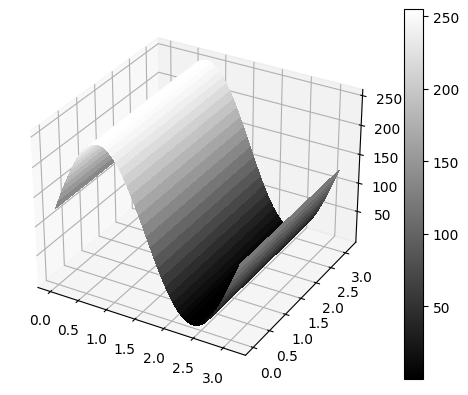

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, Y1, img1, cmap='gray', linewidth=0, antialiased=False)
fig.colorbar(surf)

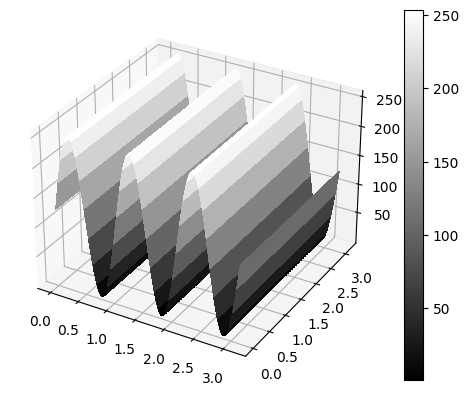

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X2, Y2, img2, cmap='gray', linewidth=0, antialiased=False)
fig.colorbar(surf)

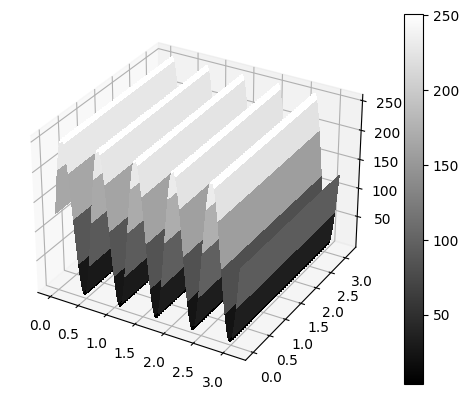

In [26]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X3, Y3, img3, cmap='gray', linewidth=0, antialiased=False)
fig.colorbar(surf)

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

In [27]:
#define the size of the image
#define the radius
#define the position of the radius
#define the overlaps

# Olympic Rings

## Defining Parameters

In order to plot the Olympic Rings using image processing, I utilized a blank white canvas. I then created functions to create the individual circles and mapped them onto the blank canvas.

In [28]:
def Canvas(size): #defines an empty canvas with size x size as the size
  gridx = np.linspace(-1,1,size) #linspace from -1 to 1 to correspond to a meshgrid where the center is 0
  X,Y = np.meshgrid(gridx,gridx)
  canvas = np.zeros((size,size,3)) #initializing the canvas
  canvas[:,:,:] = 255 #setting all the points to white
  return canvas

In [29]:
bit = 10 #"bitsize"
img_size = 2**bit #this creates a 1024 by 1024 blank white image
canvas = Canvas(img_size) #this creates a 1024 by 1024 blank white image

The function Coordinates() returns the indeces on the canvas where the circle will be plotted on.

In [30]:
def Coordinates(img_size,xpc,ypc,radius): #arguments: size of canvas, center of the circle, radius of the circle
    #img_size = len(canvas[0,:,0])
    xc, yc = xpc/img_size, ypc/img_size #determines the ratio of the distance from
    xs, ys = np.linspace(-1,1,img_size), np.linspace(-1,1,img_size) #initialize the 0 value to be at the center
    h = 55 #thickness of the rings
    inner_r = radius/img_size #inner radius
    outer_r = (radius+h)/img_size #outer radius
    X, Y = np.meshgrid(xs,ys)
    R = np.sqrt((X-xc)**2 + (Y-yc)**2)
    coords = np.where((R < outer_r) & (R > inner_r)) #the indexed points of the rings
    return coords

#Creating the Olympic Rings

#### Defining Colors

In the code below, I defined the colors of the Olympic Rings as arrays whose elements correspond to the red,green,blue channel respectively.

In [31]:
#[Red, Green, Blue]
blue = [0,0,255]
yellow = [255,255,0]
black = [0,0,0]
green = [0,255,0]
red = [255,0,0]

The code below calls the previewsly created functions Coordinates() and assigned it to a variable. That variable is then used to index where particular colors are assigned.

In [32]:
bluecoord = Coordinates(img_size,-650,-200, 256)
yellowcoord = Coordinates(img_size,-350,100, 256)
blackcoord = Coordinates(img_size,0,-200, 256)
greencoord = Coordinates(img_size,350,100, 256)
redcoord = Coordinates(img_size,650,-200, 256)
canvas[bluecoord] = blue
canvas[yellowcoord] = yellow
canvas[blackcoord] = black
canvas[greencoord] = green
canvas[redcoord] = red


The Olympic Rings are then recreated after plotting the canvas with the proper color assignments. However, the overlaps were not perfectly recreated.

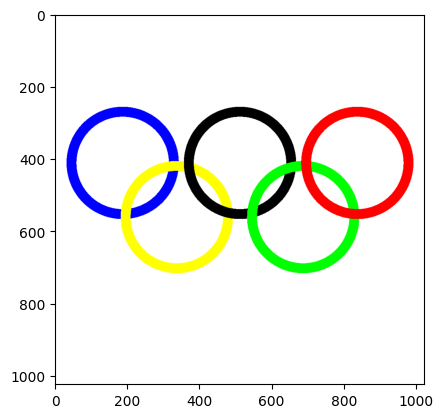

In [33]:
plt.imshow(canvas)

### Trial Code

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

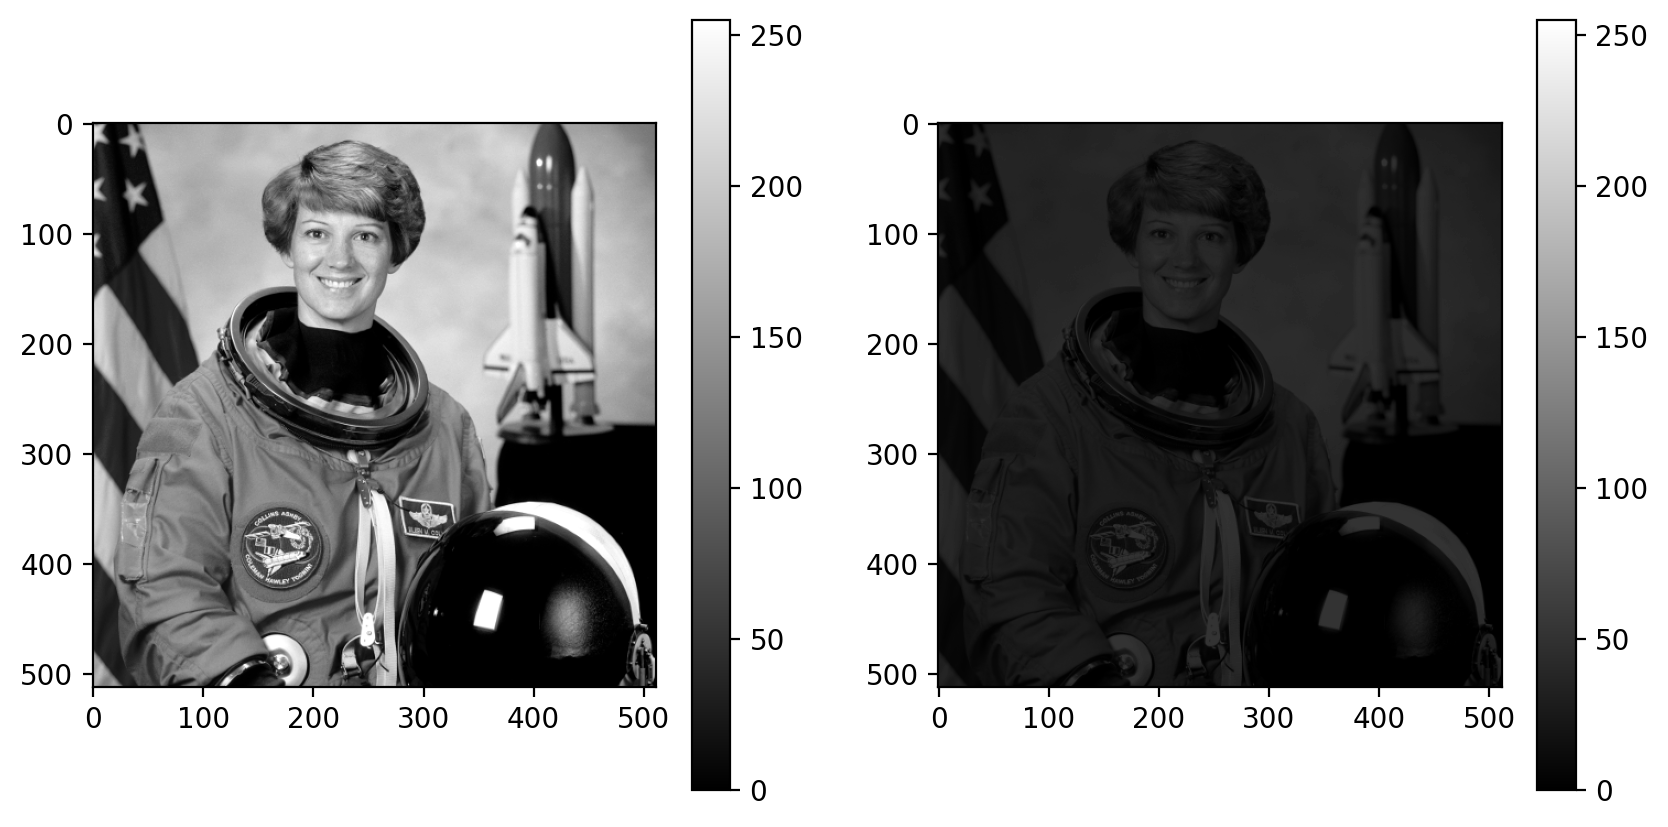

In [34]:
from skimage import color, data, exposure, img_as_float
from skimage.transform import rescale

img = img_as_float(color.rgb2gray(data.astronaut()))*256 # original astronaut image in float array
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

#Contrast Stretching

Skimage is the main library used to process the following codes. To stretch the contrast of the image, the 100th, 75th, 45th, 35th percentiles of the pixel distribution of the low contrast image were calculated. This was then used as the bases for stretching the the image. In the function exposure.rescale_intensity, the in_range value corresponds to a range. Values below this range are treated as minimum intensity and values above the range are treated as the maximum intensity. Hence, narrowing the range increases the contrast and stretching the range decreases the contrast.

In [35]:
p0,p100 = np.percentile(img_low_contrast, (0, 100)) #getting the 100th percentile or ultimately the entire range
p25, p75 = np.percentile(img_low_contrast, (25, 75)) #getting the 25th and 75th percentile
p35, p45 = np.percentile(img_low_contrast, (35, 45)) #getting the 35th and 45th percentile
img_rescale = exposure.rescale_intensity(img_low_contrast, in_range = (p0,p100))*256 #rescaling intensities to entire range of the low contrast image
img_rescale_high = exposure.rescale_intensity(img_low_contrast, in_range = (p0, p75))*256 #rescaling intensities to a narrow range
img_rescale_higher = exposure.rescale_intensity(img_low_contrast, in_range = (p35, p45))*256 #rescaling intensities to a narrower range

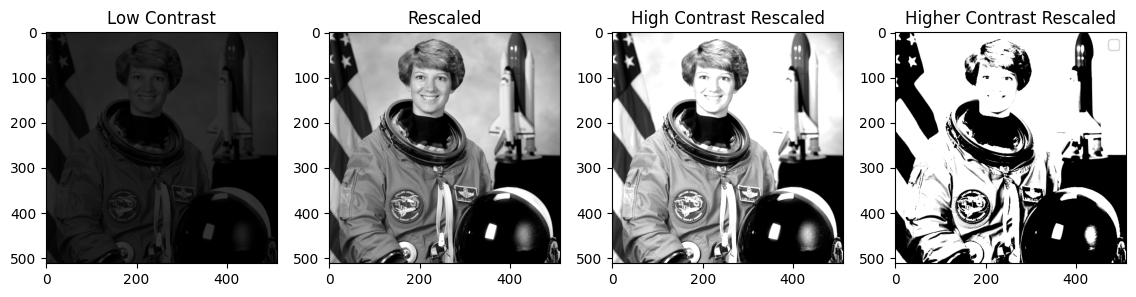

In [36]:
fig, axs = plt.subplots(1,4, figsize = (14,3)) #visualization of the various rescaling setting (i.e. contrast)
axs[0].imshow(img_low_contrast, cmap = 'gray', vmax = 255)
axs[0].set_title("Low Contrast")

axs[1].imshow(img_rescale, cmap = 'gray', vmax = 255, label = "Rescaled")
axs[1].set_title("Rescaled")

axs[2].imshow(img_rescale_high, cmap = 'gray', vmax = 255, label = "High Contrast Rescaled" )
axs[2].set_title("High Contrast Rescaled")

axs[3].imshow(img_rescale_higher, cmap = 'gray', vmax = 255, label = "Higher Contrast Rescaled")
axs[3].set_title("Higher Contrast Rescaled")
plt.legend()
plt.show()

## Plotting the PDF and CDF

In [37]:
def get_cdf(img): #compute the Commulative Density Function
  hist, bins = np.histogram(img.flatten(), 256, [0, 256])#, density = True) #gets the number of counts (hist) and number of bins
  cdf = hist.cumsum() #cumulative some of the hist
  cdf_normalized = cdf / cdf.max() #normalize to (0,1)
  return cdf_normalized

The function plot_img_dists() below was referenced from the Histogram Equalization sample of skimage library.

In [38]:
#defining function for convenient plotting
def plot_img_dists(img, axes, bins = 256): #arguments: image, axis coordinates, number of bins
  cdf = get_cdf(img) #get the CDF using the defined function
  ax_img,ax_hist = axes #assign axis coordinates to ax_img and ax_hist
  ax_cdf = ax_hist.twinx() #to add another axis shared with ax_hist
  #plotting
  ax_img.imshow(img, cmap = "gray",vmax = 255)
  ax_hist.hist(img.flatten(), bins , [0, 256], color='r', density = True, label = "PDF")
  ax_hist.set_xlabel('Pixel intensity')
  ax_cdf.plot(cdf, label = "CDF",color = 'g', alpha = 0.8)
  ax_hist.legend(loc='upper right')
  ax_cdf.legend(loc='upper left')

  return ax_img, ax_hist, ax_cdf

### Visualization

The graphic below visualizes the effect of contrast stretching on the CDF and PDF. For a low contrast image, the PDF is skewed to the left and the CDF is also skewed to the left. As the contrast of the image is increased, the PDF becomes more saturated at the minimums and the maximums, which is effected. This is because there are less gray pixels due to the thresholding done in the function exposure.rescale_intensity. The slope of the CDF of the high contrast image is highest at the minimum intensity and the maximum intensit while it is low at the gray intensities.

The code below was referenced from the Histogram Equalization example of the skimage library.

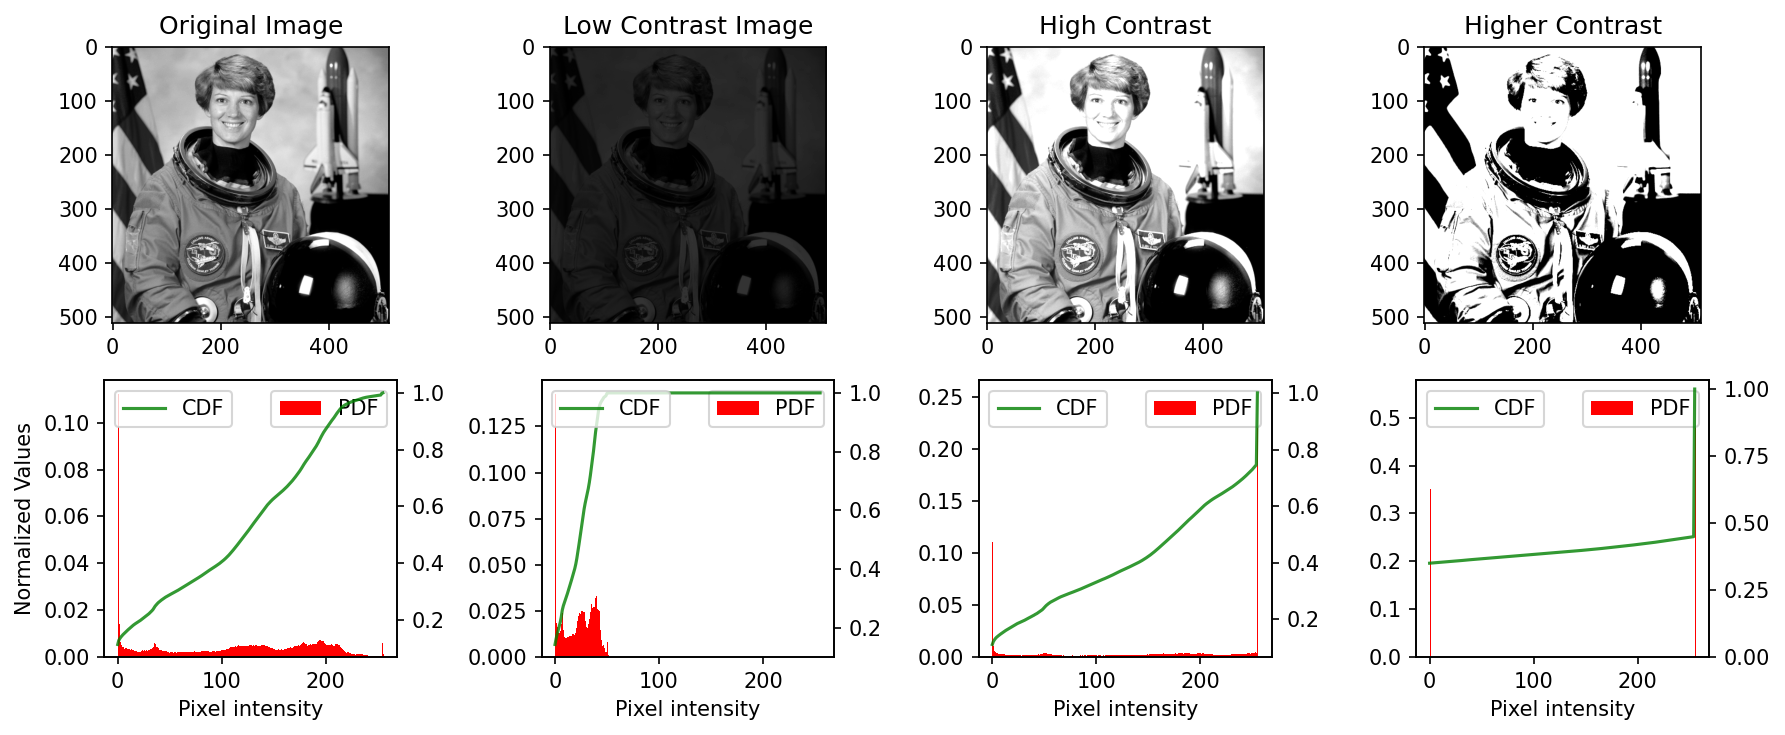

In [39]:
fig = plt.figure(figsize=(12, 5), dpi = 150) #create figure
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1 + i)#sharex=axes[0, 0], sharey=axes[0, 0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_dists(img, axes[:, 0]) #1st col #call the previously defined function for plotting
ax_img.set_title('Original Image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Normalized Values')
#ax_hist.set_ylim(0,0.1)

ax_img, ax_hist, ax_cdf = plot_img_dists(img_low_contrast, axes[:, 1]) #2nd col #call the previously defined function for plotting
ax_img.set_title('Low Contrast Image')

ax_img, ax_hist, ax_cdf = plot_img_dists(img_rescale_high, axes[:, 2]) #3rd col #call the previously defined function for plotting
ax_img.set_title('High Contrast')

ax_img, ax_hist, ax_cdf = plot_img_dists(img_rescale_higher, axes[:, 3]) #4th col  #call the previously defined function for plotting
ax_img.set_title('Higher Contrast')

#ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

# References
* Histogram Equalization — skimage 0.23.1 documentation. (n.d.). https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py

* skimage.exposure — skimage 0.23.1 documentation. (n.d.). https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity

* skimage.transform — skimage 0.23.1 documentation. (n.d.). https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.rescale